In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sn
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR


In [2]:
deposit_df=pd.read_csv('deposit.csv')

In [3]:
deposit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [4]:
deposit_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [5]:
deposit_df.y.value_counts(normalize=True)*100

no     92.76
yes     7.24
Name: y, dtype: float64

<AxesSubplot:>

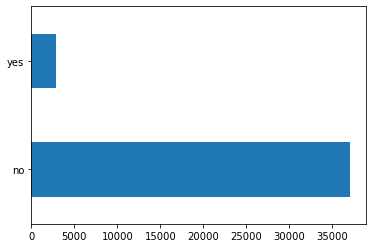

In [6]:
deposit_df.y.value_counts().plot(kind='barh')

In [7]:
job = pd.crosstab(deposit_df['job'],deposit_df['y'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

# before proceeding to k-validation part I'd like to visiualize the possibility of subscription of each independent variable

C:\Users\Yeni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


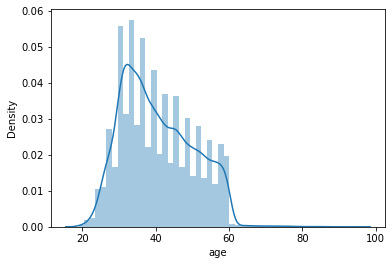

In [8]:
#age distribution 

sn.distplot(deposit_df['age']);

#We can infer that most of the clients fall in the age group between 20-60. so aiming age group not belong to this category 
#wouldn't make sense

In [29]:
job = pd.crosstab(deposit_df['job'],deposit_df['y'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

In [28]:
deposit_df['job'].value_counts()

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

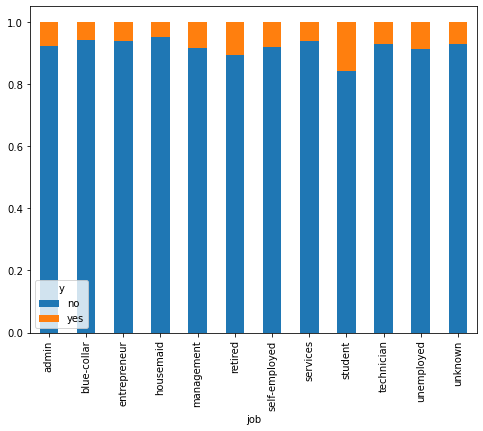

In [10]:
#type of jobs and their subscription percentages

job_norm.plot.bar(stacked=True,figsize=(8,6));


#From the below graph we can conclude that students and retired people have higher chances of subscribing to a term deposit, 
#which might be unexpected as students generally do not subscribe to a term deposit. 
#The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

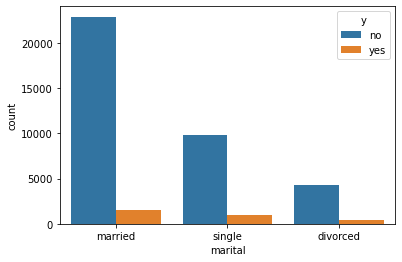

In [11]:
#subsription numbers based on marital status of customers

sn.countplot(data=deposit_df, x='marital',hue='y');


In [30]:
marry = pd.crosstab(deposit_df['marital'],deposit_df['y'])
marry_norm = marry.div(marry.sum(1).astype(float), axis=0)

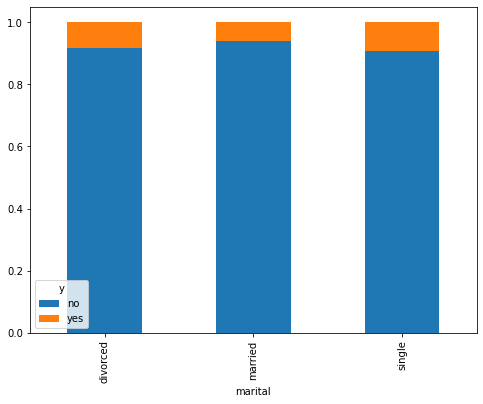

In [32]:
marry_norm.plot.bar(stacked=True,figsize=(8,6));

#martial status has no significant impact on subscription so we can pass this part


In [12]:
#default vs subscription

dflt = pd.crosstab(deposit_df['default'], deposit_df['y'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

y,no,yes
default,,
no,0.927356,0.072644
yes,0.939431,0.060569


<AxesSubplot:xlabel='default'>

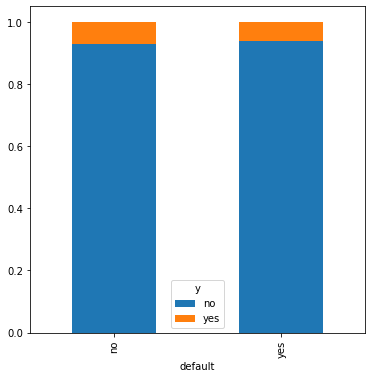

In [20]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

#again having credit in default seems no significant impact on subscription

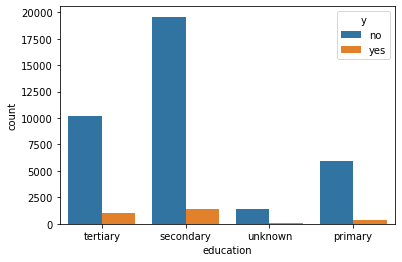

In [14]:
#education vs subscription

sn.countplot(data=deposit_df, x='education',hue='y');


In [37]:
ed = pd.crosstab(deposit_df['education'],deposit_df['y'])
ed_norm = ed.div(ed.sum(1).astype(float), axis=0)

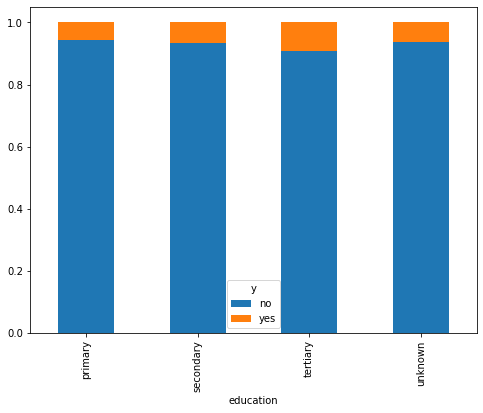

In [38]:
ed_norm.plot.bar(stacked=True,figsize=(8,6));

#tertiary education has slightly higher chance to subscribed,which can be considered that educated people must be targeted
#by the company


C:\Users\Yeni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


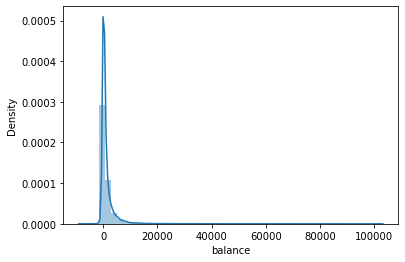

In [15]:
#distribution of balance 


sn.distplot(deposit_df['balance']);




In [21]:
# personal loan vs subscription

dflt = pd.crosstab(deposit_df['loan'], deposit_df['y'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm


y,no,yes
loan,,
no,0.923919,0.076081
yes,0.945166,0.054834


<AxesSubplot:xlabel='loan'>

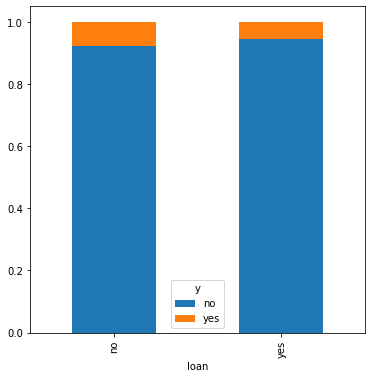

In [22]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))


#having personal loan has no impact on subcription so campaigns that company is to make shouldn't subcategorize it


<AxesSubplot:xlabel='loan'>

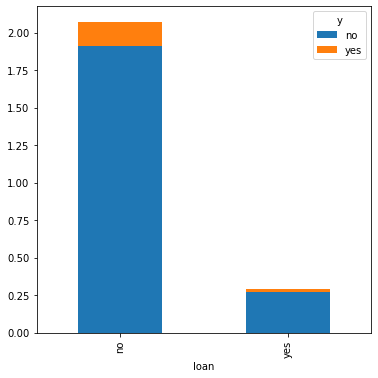

In [39]:
#housing loan vs subscription

house = pd.crosstab(deposit_df['housing'], deposit_df['y'])
house_norm = dflt.div(house.sum(1).astype(float), axis=0)

house_norm.plot.bar(stacked=True, figsize=(6,6))

# having not housing loan seems to have higher likelihood of subscription marketing segmention should include this fact.


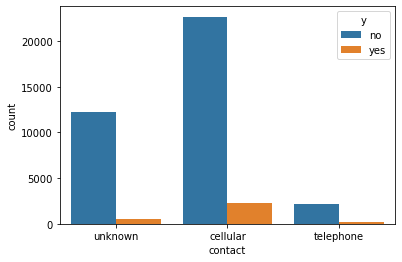

In [23]:
#contact communication type vs subscription

sn.countplot(data=deposit_df, x='contact',hue='y');


<AxesSubplot:xlabel='contact'>

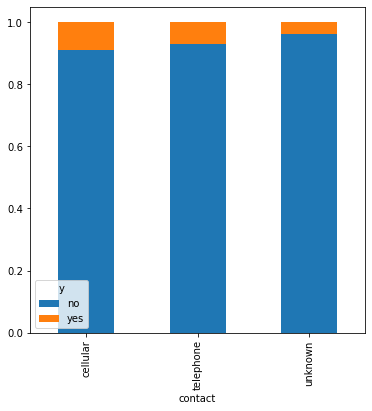

In [41]:
contact = pd.crosstab(deposit_df['contact'], deposit_df['y'])
contact_norm = contact.div(contact.sum(1).astype(float), axis=0)

contact_norm.plot.bar(stacked=True, figsize=(6,6))


#cellular type of contact seems to be more convinceable when it comes to subscription,as cellphones are so common 
#there might no need for specific strategy for those who use cellphone

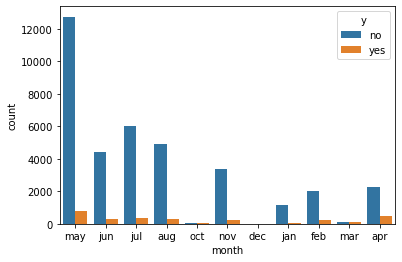

In [24]:
# contact month vs subscription
sn.countplot(data=deposit_df, x='month',hue='y');

#contact month and subscription have no distinct relation therefore each month must be treated as same


C:\Users\Yeni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


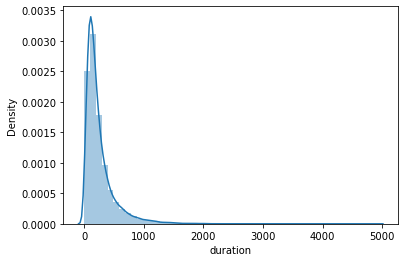

In [26]:
# distribution of duration

sn.distplot(deposit_df['duration']);


In [36]:
# -) Created a binary outcome variable (for "y") called is_subscribed that takes the value 1 if y = yes and 0 otherwise.

deposit_df['is_subscribed'] = [1 if status == 'yes' else 0 for status in deposit_df['y']]
deposit_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,is_subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,0


In [8]:
deposit_df = deposit_df.drop("y", axis=1)

deposit_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,is_subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0


In [9]:
X_features = list(deposit_df.columns)
X_features.remove('is_subscribed')

outcome = 'is_subscribed'

X_df = pd.get_dummies(deposit_df[X_features], drop_first=True)
X = sm.add_constant(X_df)
y = deposit_df[outcome]
X.head()



,const,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,1.0,58,2143,5,261,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1.0,44,29,5,151,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,33,2,5,76,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,47,1506,5,92,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,33,1,5,198,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=800)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9232

In [12]:
#success metrics

from sklearn.model_selection import cross_val_score

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)

[0.931875 0.93325  0.924875 0.916125 0.920875]


In [14]:
#average performance score is 92.54% which is larger than 81% by 11.54%


print(scores.mean())

0.9254


In [15]:
#BONUS PART

#- There is no multicollinearity based on correlation matrix

corr_df = deposit_df.corr()
row_name = []
for item in corr_df:
    row_name.append(item)
for item2 in corr_df:
    print("/"*35)
    print(item2)
    print("-"*35)
    for item3 in row_name:
        if corr_df[item2][item3] < -0.7 or corr_df[item2][item3] > 0.7 and corr_df[item2][item3] != 1 :
            print(corr_df[item2][item3],item3)
        else:
            continue

///////////////////////////////////
age
-----------------------------------
///////////////////////////////////
balance
-----------------------------------
///////////////////////////////////
day
-----------------------------------
///////////////////////////////////
duration
-----------------------------------
///////////////////////////////////
campaign
-----------------------------------
///////////////////////////////////
is_subscribed
-----------------------------------


In [16]:
# In order for finding customers who are more likely to buy the investment product, I decided to run logistic regresssion

# After running logistic regression I eliminated insignificant variables (p>0.05) as they have no impact on the subscription deecision

In [17]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [18]:
logit = sm.Logit(train_y, train_X)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.166524
         Iterations 8


In [19]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.361     
Dependent Variable:  is_subscribed     AIC:               10731.5326
Date:                2022-01-19 01:06  BIC:               11041.3518
No. Observations:    32000             Log-Likelihood:    -5328.8   
Df Model:            36                LL-Null:           -8334.6   
Df Residuals:        31963             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const               -3.0353   0.2372 -12.7960 0.0000 -3.5002 -2.5704
age                 -0.0041   0.0034  -1.2161 0.2240 -0.0108  0.0025
balance              0.0000   0.0000   2.3773 0.0174  0.0000  0.0000
day                  0.0357   0.0040   8.9401 0.0000  0.0278  0.0435
duration             0.0049   0.0001  56.5072 0.0000  0.0047  0.0051
campaign            -0.0499   0.0129  -3.8693 0.0001 -0.0752 -0.0246
job_blue-collar     -0.3077   0.1007  -3.0565 0.0022 -0.5049 -0.1104
job_entrepreneur    -0.3830   0.1762  -2.1731 0.0298 -0.7284 -0.0376
job_housemaid       -0.7191   0.2130  -3.3760 0.0007 -1.1366 -0.3016
job_management      -0.1555   0.1089  -1.4279 0.1533 -0.3689  0.0579
job_retired          0.2473   0.1578   1.5672 0.1171 -0.0620  0.5565
job_self-employed   -0.2475   0.1614  -1.5333 0.1252 -0.5638  0.0689
job_services        -0.3748   0.1197  -3.1305 0.0017 -0.6094 -0.1401
job_student          0.3343   0.1856   1.8010 0.0717 -0.0295  0.6980
job_technician      -0.1374   0.0995  -1.3816 0.1671 -0.3324  0.0575
job_unemployed      -0.2933   0.1669  -1.7577 0.0788 -0.6204  0.0337
job_unknown          0.0144   0.3554   0.0406 0.9676 -0.6822  0.7110
marital_married     -0.3632   0.0822  -4.4202 0.0000 -0.5243 -0.2022
marital_single      -0.0643   0.0931  -0.6907 0.4897 -0.2468  0.1182
education_secondary  0.1200   0.0928   1.2934 0.1959 -0.0618  0.3018
education_tertiary   0.2735   0.1105   2.4756 0.0133  0.0570  0.4900
education_unknown   -0.1151   0.1692  -0.6803 0.4963 -0.4467  0.2165
default_yes          0.3573   0.1857   1.9235 0.0544 -0.0068  0.7213
housing_yes         -0.6624   0.0635 -10.4264 0.0000 -0.7869 -0.5379
loan_yes            -0.2383   0.0796  -2.9919 0.0028 -0.3943 -0.0822
contact_telephone   -0.3802   0.1334  -2.8507 0.0044 -0.6416 -0.1188
contact_unknown     -2.0005   0.1019 -19.6413 0.0000 -2.2002 -1.8009
month_aug           -1.4894   0.1173 -12.7002 0.0000 -1.7192 -1.2595
month_dec            0.6265   1.0723   0.5842 0.5591 -1.4753  2.7282
month_feb           -0.0713   0.1269  -0.5615 0.5744 -0.3200  0.1775
month_jan           -3.1170   0.2548 -12.2329 0.0000 -3.6165 -2.6176
month_jul           -1.5596   0.1053 -14.8123 0.0000 -1.7659 -1.3532
month_jun            0.7151   0.1471   4.8613 0.0000  0.4268  1.0035
month_mar            2.0554   0.1716  11.9789 0.0000  1.7191  2.3917
month_may           -0.2724   0.0913  -2.9824 0.0029 -0.4514 -0.0934
month_nov           -1.4407   0.1185 -12.1557 0.0000 -1.6730 -1.2084
month_oct            3.6238   0.3259  11.1185 0.0000  2.9850  4.2626
====================================================================

"""

In [20]:
def backward_elimination(model, y, X, features):
    while True:
        if max(model.pvalues[features]) > 0.05:
            drop_variable = model.pvalues[model.pvalues == max(model.pvalues[features])]
            print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
            X = X.drop(columns = [drop_variable.index[0]])
            features = features.drop(drop_variable.index[0])
            model= sm.Logit(y, X).fit()
        else:
            print("All p values less than 0.05")
            return features
            break;
        
significant_Features = backward_elimination(logit_model,train_y,train_X, X_df.columns)
print(significant_Features)

train_X = sm.add_constant(train_X[significant_Features])
logit2 = sm.Logit(train_y,train_X)
logit_model2 = logit2.fit()
logit_model2.summary2()

Dropping job_unknown and running regression again because pvalue is: 0.9676343056536919
Optimization terminated successfully.
         Current function value: 0.166524
         Iterations 8
Dropping month_feb and running regression again because pvalue is: 0.5744214925517973
Optimization terminated successfully.
         Current function value: 0.166529
         Iterations 8
Dropping month_dec and running regression again because pvalue is: 0.5382189652958143
Optimization terminated successfully.
         Current function value: 0.166534
         Iterations 8
Dropping education_unknown and running regression again because pvalue is: 0.49455418210787294
Optimization terminated successfully.
         Current function value: 0.166541
         Iterations 8
Dropping marital_single and running regression again because pvalue is: 0.4739067600189124
Optimization terminated successfully.
         Current function value: 0.166549
         Iterations 8
Dropping age and running regression again be

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.360     
Dependent Variable:   is_subscribed    AIC:              10725.3463
Date:                 2022-01-19 01:06 BIC:              10951.4306
No. Observations:     32000            Log-Likelihood:   -5335.7   
Df Model:             26               LL-Null:          -8334.6   
Df Residuals:         31973            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -3.0877   0.1057 -29.2233 0.0000 -3.2948 -2.8806
balance             0.0000   0.0000   2.2009 0.0277  0.0000  0.0000
day                 0.0367   0.0036  10.2254 0.0000  0.0296  0.0437
duration            0.0049   0.0001  56.6603 0.0000  0.0047  0.0051
campaign           -0.0512   0.0129  -3.9846 0.0001 -0.0764 -0.0260
job_blue-collar    -0.4029   0.0865  -4.6577 0.0000 -0.5724 -0.2334
job_entrepreneur   -0.4696   0.1687  -2.7833 0.0054 -0.8002 -0.1389
job_housemaid      -0.8575   0.2032  -4.2201 0.0000 -1.2558 -0.4593
job_management     -0.2513   0.0960  -2.6181 0.0088 -0.4394 -0.0632
job_self-employed  -0.3351   0.1536  -2.1819 0.0291 -0.6361 -0.0341
job_services       -0.4363   0.1112  -3.9227 0.0001 -0.6542 -0.2183
job_technician     -0.2059   0.0878  -2.3445 0.0191 -0.3781 -0.0338
job_unemployed     -0.3995   0.1585  -2.5204 0.0117 -0.7101 -0.0888
marital_married    -0.3486   0.0543  -6.4196 0.0000 -0.4550 -0.2422
education_tertiary  0.1991   0.0747   2.6671 0.0076  0.0528  0.3455
housing_yes        -0.6562   0.0614 -10.6906 0.0000 -0.7765 -0.5359
loan_yes           -0.2246   0.0791  -2.8387 0.0045 -0.3797 -0.0695
contact_telephone  -0.3989   0.1316  -3.0310 0.0024 -0.6569 -0.1410
contact_unknown    -2.0124   0.1007 -19.9839 0.0000 -2.2097 -1.8150
month_aug          -1.4690   0.1065 -13.7972 0.0000 -1.6776 -1.2603
month_jan          -3.1021   0.2534 -12.2413 0.0000 -3.5988 -2.6054
month_jul          -1.5365   0.0979 -15.6918 0.0000 -1.7285 -1.3446
month_jun           0.7405   0.1317   5.6216 0.0000  0.4823  0.9987
month_mar           2.0843   0.1638  12.7262 0.0000  1.7633  2.4053
month_may          -0.2455   0.0799  -3.0739 0.0021 -0.4021 -0.0890
month_nov          -1.4264   0.1121 -12.7223 0.0000 -1.6462 -1.2067
month_oct           3.6419   0.3232  11.2701 0.0000  3.0086  4.2753
===================================================================

"""

 ###  as graph analysis made via graphs, logistic regression also indicates the same results:
 
 # students and retired people must be aimed
 # marital status should be ignored
 # having credit in default neither significant nor has an impact on subcription
 # tertiary education matters when it comes to subscription
 # not having housing lone has a higher chance to subcribe
 #  according to logistic regression months june,march and october has a higher chance for subcription yet graphs don't give that intution in that regard
 # Again higher the campaing duration is,higher the possibility of subcription based on regression analysis 
 
 
 # if resources are allocated this way,being successful is more likely for the company